In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

from plotly.subplots import make_subplots
from sklearn.impute import SimpleImputer
import plotly.graph_objects as go
colors = ['#082040', '#175073', '#3285A6', '#B8D0D9', '#6CC5D9']

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Алгоритмы ХИИ/featured_dataset.csv')

<ipython-input-3-feaa7503686d>:1: DtypeWarning: Columns (303,304,305,312,313,314,321,322,323,330,331,332,339,340,341,348,349,350,357,358,359,366,367,368,375,376,377,384,385,386,393,394,395,510,511,512,519,520,521,528,529,530,537,538,539,546,547,548,555,556,557,564,565,566,573,574,575,582,583,584,591,592,593,600,601,602,609,610,611,617,618,619,625,626,627,631,632,633,634,635,641,642,643,649,650,651,657,658,659,665,666,667,673,674,675,681,682,683,689,690,691,697,698,699,705,706,707,713,714,715,721,722,723,727,728,729,730,731,737,738,739,745,746,747,753,754,755,761,762,763,769,770,771,777,778,779,785,786,787,793,794,795,801,802,803,957,993,994,995,1009,1010,1011,1251,1252) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Алгоритмы ХИИ/featured_dataset.csv')


In [ ]:
data.head()

,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,120.111,116.079,120.032363,44,0.192350,-0.288633,0.288633,0.192350,1.555556,2.333333,...,8.773230,56.918277,120.032363,9.233259,105,7,40.0,45.0,3.472222,2.277778
1,124.183,112.087,124.088815,50,0.087513,-0.368976,0.368976,0.087513,1.111111,1.888889,...,9.964253,61.835066,124.088815,5.908991,75,10,58.0,76.0,2.305556,1.805556
2,118.132,108.052,118.062994,48,0.150906,-0.390241,0.390241,0.150906,1.750000,2.250000,...,8.124151,34.544698,118.062994,6.559055,67,8,30.0,31.0,4.722222,2.111111
3,127.147,118.075,127.074562,50,0.168557,-0.486682,0.486682,0.168557,2.000000,2.666667,...,7.739359,34.994205,127.074562,7.059698,110,7,32.0,31.0,4.361111,2.416667
4,120.151,112.087,120.057515,46,0.142589,-0.364245,0.364245,0.142589,1.666667,2.333333,...,9.372374,59.406478,120.057515,7.062207,89,10,44.0,54.0,4.173611,2.291667


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 1483 entries, MolWt to mZagreb2
dtypes: float64(875), int64(230), object(378)
memory usage: 226.3+ MB


# Удаляем пустые данные и дубликаты

In [4]:
data_skipp = data.copy()
data_skipp = data_skipp.dropna()
data_skipp = data_skipp.drop_duplicates()

In [5]:
# Удалим столбцы с более чем 70% пропусков
num_rows = len(data_skipp)

threshold = 0.3 * num_rows

cleaned_data = data_skipp.dropna(axis=1, thresh=threshold)

Смотррим количество пустых значений

In [ ]:
cleaned_data.isna().sum()

MolWt                  0
HeavyAtomMolWt         0
ExactMolWt             0
NumValenceElectrons    0
MaxPartialCharge       0
                      ..
WPol                   0
Zagreb1                0
Zagreb2                0
mZagreb1               0
mZagreb2               0
Length: 1483, dtype: int64

In [ ]:
# Смотрим количественное отношение пропусков в датасете
for col in cleaned_data.columns:
    pct_missing = np.mean(cleaned_data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Work with missing data

In [6]:
# Let's create a copy of our dataset to explore ways to work with missing data
cleaned_data = cleaned_data.copy()

# Setting up random gaps
for col in cleaned_data.loc[:, 'MolWt':].columns:
    # With a probability of 0.1 (or any other that you choose), we set a pass
    mask = np.random.rand(len(cleaned_data)) < 0.1  #Randomly select the values that we want to delete
    cleaned_data.loc[mask, col] = np.nan

# Output the result
cleaned_data

,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,120.111,116.079,120.032363,44.0,0.192350,NaN,0.288633,0.192350,NaN,2.333333,...,8.773230,56.918277,120.032363,9.233259,105.0,NaN,40.0,NaN,NaN,2.277778
1,124.183,112.087,124.088815,50.0,NaN,-0.368976,0.368976,0.087513,1.111111,1.888889,...,9.964253,61.835066,124.088815,5.908991,75.0,10.0,58.0,NaN,2.305556,1.805556
2,118.132,108.052,118.062994,48.0,0.150906,-0.390241,0.390241,NaN,1.750000,2.250000,...,8.124151,34.544698,118.062994,6.559055,67.0,8.0,30.0,31.0,4.722222,2.111111
3,NaN,118.075,127.074562,50.0,0.168557,-0.486682,0.486682,0.168557,2.000000,2.666667,...,7.739359,34.994205,127.074562,7.059698,110.0,7.0,NaN,31.0,NaN,2.416667
4,120.151,112.087,NaN,46.0,0.142589,-0.364245,0.364245,NaN,1.666667,2.333333,...,9.372374,59.406478,NaN,NaN,89.0,10.0,44.0,NaN,4.173611,2.291667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,128.127,120.063,128.047344,50.0,0.316199,NaN,0.435234,NaN,1.777778,2.555556,...,9.468928,55.871443,128.047344,7.532197,73.0,9.0,52.0,NaN,3.284722,1.833333
19996,125.127,118.071,125.047678,48.0,0.141193,-0.303021,0.303021,0.141193,1.555556,NaN,...,NaN,62.227835,125.047678,NaN,88.0,8.0,52.0,67.0,3.284722,2.069444
19997,109.128,102.072,109.052764,42.0,0.111511,-0.380679,0.380679,0.111511,1.750000,2.375000,...,7.475906,33.090360,109.052764,7.270184,79.0,5.0,28.0,26.0,4.111111,2.083333
19998,113.120,106.064,113.058912,NaN,0.219846,-0.290652,0.290652,0.219846,1.750000,2.250000,...,8.124151,34.544698,113.058912,7.537261,NaN,8.0,NaN,31.0,4.722222,2.111111


# Heatmap of missing data

<Axes: >

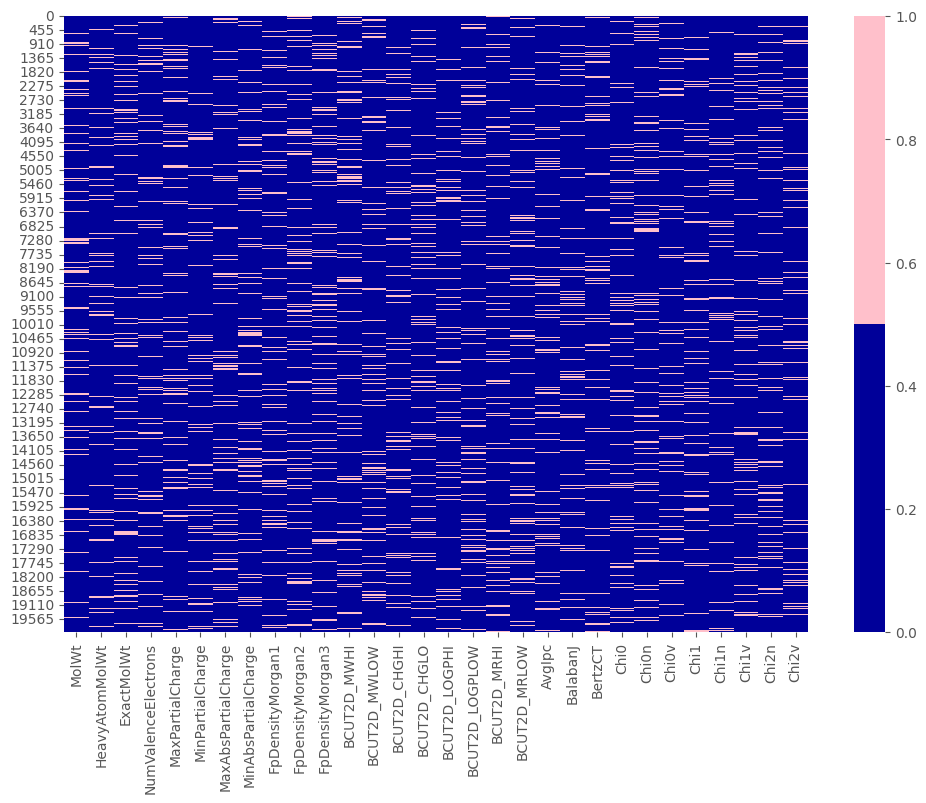

In [ ]:
cols = cleaned_data.columns[:30] # первые 30 колонок

# розовый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#FFC0CB']
sns.heatmap(cleaned_data[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
cleaned_data.isna().sum()

MolWt                  2036
HeavyAtomMolWt         2061
ExactMolWt             2000
NumValenceElectrons    1933
MaxPartialCharge       2060
                       ... 
WPol                   1993
Zagreb1                1965
Zagreb2                1970
mZagreb1               1973
mZagreb2               2001
Length: 1483, dtype: int64

# Deleting data

In [7]:
cleaned_data = cleaned_data.dropna(subset=['MolWt']) # Removing missing rows from the target column

In [ ]:
# Удаляем колонки
cleaned_data = cleaned_data.drop(['HeavyAtomMolWt', 'ExactMolWt', 'MW'], axis=1)

In [10]:
# Вычисляем количество строк в датафрейме
num_rows = len(cleaned_data)

# Задаем пороговое значение для удаления столбцов (например, 70% пропусков)
threshold = 0.7 * num_rows

# Удаляем столбцы, в которых количество пропусков больше порогового значения
cleaned_impute_data = cleaned_data.dropna(axis=1, thresh=threshold)

# Replacing the average, median or fashion.

In [ ]:
cleaned_impute_data.head()

,MolWt,NumValenceElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,120.111,NaN,0.192350,-0.288633,0.288633,NaN,1.555556,2.333333,2.777778,16.128354,...,8.773230,56.918277,120.032363,9.233259,105.0,7.0,40.0,45.0,3.472222,2.277778
1,124.183,50.0,0.087513,-0.368976,NaN,0.087513,1.111111,1.888889,2.222222,16.600027,...,9.964253,61.835066,124.088815,5.908991,75.0,10.0,58.0,76.0,2.305556,1.805556
3,127.147,50.0,0.168557,-0.486682,0.486682,0.168557,NaN,2.666667,3.111111,16.460840,...,7.739359,34.994205,127.074562,NaN,NaN,7.0,32.0,31.0,4.361111,2.416667
4,120.151,46.0,0.142589,-0.364245,0.364245,0.142589,1.666667,2.333333,NaN,NaN,...,9.372374,59.406478,120.057515,7.062207,89.0,10.0,44.0,54.0,4.173611,2.291667
5,122.131,46.0,0.184864,-0.394861,0.394861,0.184864,1.777778,2.444444,NaN,15.131617,...,8.782476,51.691682,122.059246,8.137283,NaN,10.0,42.0,48.0,4.083333,2.138889


# Filling in using kNN

In [ ]:
from sklearn.impute import KNNImputer

# Let's choose only numerical values
numeric_data = cleaned_impute_data.select_dtypes(include=['float64', 'int64'])

imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(numeric_data)
impute_data = pd.DataFrame(imputed_data, columns=numeric_data.columns)

# Work with duplicates

Removing complete duplicates

In [11]:
# Removing complete duplicates
df_final = cleaned_impute_data.drop_duplicates()
df_final

,MolWt,NumValenceElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,...,SRW09,SRW10,TSRW10,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,120.111,44.0,0.192350,NaN,0.288633,0.192350,NaN,2.333333,2.777778,16.128354,...,7.638680,8.773230,56.918277,9.233259,105.0,NaN,40.0,NaN,NaN,2.277778
1,124.183,50.0,NaN,-0.368976,0.368976,0.087513,1.111111,1.888889,2.222222,16.600027,...,8.334472,9.964253,61.835066,5.908991,75.0,10.0,58.0,NaN,2.305556,1.805556
2,118.132,48.0,0.150906,-0.390241,0.390241,NaN,1.750000,2.250000,2.250000,16.491335,...,0.000000,8.124151,34.544698,6.559055,67.0,8.0,30.0,31.0,4.722222,2.111111
4,120.151,46.0,0.142589,-0.364245,0.364245,NaN,1.666667,2.333333,2.444444,16.495677,...,8.134174,9.372374,59.406478,NaN,89.0,10.0,44.0,NaN,4.173611,2.291667
5,122.131,46.0,0.184864,NaN,0.394861,0.184864,1.777778,2.444444,2.666667,15.131617,...,6.762730,8.782476,51.691682,8.137283,84.0,10.0,42.0,48.0,4.083333,2.138889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,128.127,50.0,0.316199,NaN,0.435234,NaN,1.777778,2.555556,2.777778,16.719505,...,NaN,9.468928,55.871443,7.532197,73.0,9.0,52.0,NaN,3.284722,1.833333
19996,125.127,48.0,0.141193,-0.303021,0.303021,0.141193,1.555556,NaN,2.666667,NaN,...,8.547722,NaN,62.227835,NaN,88.0,8.0,52.0,67.0,3.284722,2.069444
19997,109.128,42.0,0.111511,-0.380679,0.380679,0.111511,1.750000,2.375000,2.750000,16.263984,...,0.000000,7.475906,33.090360,7.270184,79.0,5.0,28.0,26.0,4.111111,2.083333
19998,113.120,NaN,0.219846,-0.290652,0.290652,0.219846,1.750000,2.250000,2.250000,16.142039,...,0.000000,8.124151,34.544698,7.537261,NaN,8.0,NaN,31.0,4.722222,2.111111


Remove duplicate molecules





In [30]:
df = pd.read_csv('/content/drive/MyDrive/Алгоритмы ХИИ/new_qm9.csv')
repeat_df = pd.concat([df['gap'], df_final], axis=1)
repeat_df = pd.concat([df['smiles'], repeat_df], axis=1)

In [31]:
repeat_df.head()

,smiles,gap,MolWt,NumValenceElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,...,SRW09,SRW10,TSRW10,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,O=CC#CC1NC1C#N,0.1980,120.111,44.0,0.192350,NaN,0.288633,0.192350,NaN,2.333333,...,7.638680,8.773230,56.918277,9.233259,105.0,NaN,40.0,NaN,NaN,2.277778
1,CC1C2OC2C2CCC12,0.3333,124.183,50.0,NaN,-0.368976,0.368976,0.087513,1.111111,1.888889,...,8.334472,9.964253,61.835066,5.908991,75.0,10.0,58.0,NaN,2.305556,1.805556
2,COC(C=O)C(C)O,0.2132,118.132,48.0,0.150906,-0.390241,0.390241,NaN,1.750000,2.250000,...,0.000000,8.124151,34.544698,6.559055,67.0,8.0,30.0,31.0,4.722222,2.111111
3,COC=NCC(N)C#N,0.2477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,COC1(CC1C#C)C#C,0.2612,120.151,46.0,0.142589,-0.364245,0.364245,NaN,1.666667,2.333333,...,8.134174,9.372374,59.406478,NaN,89.0,10.0,44.0,NaN,4.173611,2.291667


In [32]:
# Удаление строк с повторяющимися значениями в колонке 'smiles'
final_df = repeat_df.drop_duplicates(subset=['smiles'], keep='first')
final_df

,smiles,gap,MolWt,NumValenceElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,...,SRW09,SRW10,TSRW10,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,O=CC#CC1NC1C#N,0.1980,120.111,44.0,0.192350,NaN,0.288633,0.192350,NaN,2.333333,...,7.638680,8.773230,56.918277,9.233259,105.0,NaN,40.0,NaN,NaN,2.277778
1,CC1C2OC2C2CCC12,0.3333,124.183,50.0,NaN,-0.368976,0.368976,0.087513,1.111111,1.888889,...,8.334472,9.964253,61.835066,5.908991,75.0,10.0,58.0,NaN,2.305556,1.805556
2,COC(C=O)C(C)O,0.2132,118.132,48.0,0.150906,-0.390241,0.390241,NaN,1.750000,2.250000,...,0.000000,8.124151,34.544698,6.559055,67.0,8.0,30.0,31.0,4.722222,2.111111
3,COC=NCC(N)C#N,0.2477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,COC1(CC1C#C)C#C,0.2612,120.151,46.0,0.142589,-0.364245,0.364245,NaN,1.666667,2.333333,...,8.134174,9.372374,59.406478,NaN,89.0,10.0,44.0,NaN,4.173611,2.291667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,CC12COC(C1)OC2=O,0.2748,128.127,50.0,0.316199,NaN,0.435234,NaN,1.777778,2.555556,...,NaN,9.468928,55.871443,7.532197,73.0,9.0,52.0,NaN,3.284722,1.833333
19996,O=CC1CC2(NC12)C=O,0.1969,125.127,48.0,0.141193,-0.303021,0.303021,0.141193,1.555556,NaN,...,8.547722,NaN,62.227835,NaN,88.0,8.0,52.0,67.0,3.284722,2.069444
19997,CC(O)C#CCC#N,0.2863,109.128,42.0,0.111511,-0.380679,0.380679,0.111511,1.750000,2.375000,...,0.000000,7.475906,33.090360,7.270184,79.0,5.0,28.0,26.0,4.111111,2.083333
19998,CC(=N)N(C=N)C=O,0.2356,113.120,NaN,0.219846,-0.290652,0.290652,0.219846,1.750000,2.250000,...,0.000000,8.124151,34.544698,7.537261,NaN,8.0,NaN,31.0,4.722222,2.111111


In [33]:
# Удаляем строки, где значение в столбце 'gap' больше или равно выбросам
final_df = final_df.drop(final_df[final_df['gap'] >= 0.3].index)
final_df

,smiles,gap,MolWt,NumValenceElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,...,SRW09,SRW10,TSRW10,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,O=CC#CC1NC1C#N,0.1980,120.111,44.0,0.192350,NaN,0.288633,0.192350,NaN,2.333333,...,7.638680,8.773230,56.918277,9.233259,105.0,NaN,40.0,NaN,NaN,2.277778
2,COC(C=O)C(C)O,0.2132,118.132,48.0,0.150906,-0.390241,0.390241,NaN,1.750000,2.250000,...,0.000000,8.124151,34.544698,6.559055,67.0,8.0,30.0,31.0,4.722222,2.111111
3,COC=NCC(N)C#N,0.2477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,COC1(CC1C#C)C#C,0.2612,120.151,46.0,0.142589,-0.364245,0.364245,NaN,1.666667,2.333333,...,8.134174,9.372374,59.406478,NaN,89.0,10.0,44.0,NaN,4.173611,2.291667
5,Cc1c(c(n[nH]1)C#N)N,0.1967,122.131,46.0,0.184864,NaN,0.394861,0.184864,1.777778,2.444444,...,6.762730,8.782476,51.691682,8.137283,84.0,10.0,42.0,48.0,4.083333,2.138889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,CC12COC(C1)OC2=O,0.2748,128.127,50.0,0.316199,NaN,0.435234,NaN,1.777778,2.555556,...,NaN,9.468928,55.871443,7.532197,73.0,9.0,52.0,NaN,3.284722,1.833333
19996,O=CC1CC2(NC12)C=O,0.1969,125.127,48.0,0.141193,-0.303021,0.303021,0.141193,1.555556,NaN,...,8.547722,NaN,62.227835,NaN,88.0,8.0,52.0,67.0,3.284722,2.069444
19997,CC(O)C#CCC#N,0.2863,109.128,42.0,0.111511,-0.380679,0.380679,0.111511,1.750000,2.375000,...,0.000000,7.475906,33.090360,7.270184,79.0,5.0,28.0,26.0,4.111111,2.083333
19998,CC(=N)N(C=N)C=O,0.2356,113.120,NaN,0.219846,-0.290652,0.290652,0.219846,1.750000,2.250000,...,0.000000,8.124151,34.544698,7.537261,NaN,8.0,NaN,31.0,4.722222,2.111111


In [34]:
final_df = final_df.drop(final_df[final_df['gap'] <= 0.05].index)
final_df

,smiles,gap,MolWt,NumValenceElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,...,SRW09,SRW10,TSRW10,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,O=CC#CC1NC1C#N,0.1980,120.111,44.0,0.192350,NaN,0.288633,0.192350,NaN,2.333333,...,7.638680,8.773230,56.918277,9.233259,105.0,NaN,40.0,NaN,NaN,2.277778
2,COC(C=O)C(C)O,0.2132,118.132,48.0,0.150906,-0.390241,0.390241,NaN,1.750000,2.250000,...,0.000000,8.124151,34.544698,6.559055,67.0,8.0,30.0,31.0,4.722222,2.111111
3,COC=NCC(N)C#N,0.2477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,COC1(CC1C#C)C#C,0.2612,120.151,46.0,0.142589,-0.364245,0.364245,NaN,1.666667,2.333333,...,8.134174,9.372374,59.406478,NaN,89.0,10.0,44.0,NaN,4.173611,2.291667
5,Cc1c(c(n[nH]1)C#N)N,0.1967,122.131,46.0,0.184864,NaN,0.394861,0.184864,1.777778,2.444444,...,6.762730,8.782476,51.691682,8.137283,84.0,10.0,42.0,48.0,4.083333,2.138889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,CC12COC(C1)OC2=O,0.2748,128.127,50.0,0.316199,NaN,0.435234,NaN,1.777778,2.555556,...,NaN,9.468928,55.871443,7.532197,73.0,9.0,52.0,NaN,3.284722,1.833333
19996,O=CC1CC2(NC12)C=O,0.1969,125.127,48.0,0.141193,-0.303021,0.303021,0.141193,1.555556,NaN,...,8.547722,NaN,62.227835,NaN,88.0,8.0,52.0,67.0,3.284722,2.069444
19997,CC(O)C#CCC#N,0.2863,109.128,42.0,0.111511,-0.380679,0.380679,0.111511,1.750000,2.375000,...,0.000000,7.475906,33.090360,7.270184,79.0,5.0,28.0,26.0,4.111111,2.083333
19998,CC(=N)N(C=N)C=O,0.2356,113.120,NaN,0.219846,-0.290652,0.290652,0.219846,1.750000,2.250000,...,0.000000,8.124151,34.544698,7.537261,NaN,8.0,NaN,31.0,4.722222,2.111111


In [35]:
# Предположим, что у вас есть DataFrame df

# Рассчитываем количество непропущенных значений в каждой колонке
non_nan_counts = final_df.count()

# Рассчитываем порог для удаления колонок, например, оставим только те колонки, где более 80% значений не NaN
threshold = len(final_df) * 0.5

# Выбираем только те колонки, где количество непропущенных значений больше порога
selected_columns = non_nan_counts[non_nan_counts >= threshold].index

# Создаем DataFrame, содержащий только выбранные колонки
df_selected = final_df[selected_columns]
df_selected

,smiles,gap,MolWt,NumValenceElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,...,SRW09,SRW10,TSRW10,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,O=CC#CC1NC1C#N,0.1980,120.111,44.0,0.192350,NaN,0.288633,0.192350,NaN,2.333333,...,7.638680,8.773230,56.918277,9.233259,105.0,NaN,40.0,NaN,NaN,2.277778
2,COC(C=O)C(C)O,0.2132,118.132,48.0,0.150906,-0.390241,0.390241,NaN,1.750000,2.250000,...,0.000000,8.124151,34.544698,6.559055,67.0,8.0,30.0,31.0,4.722222,2.111111
3,COC=NCC(N)C#N,0.2477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,COC1(CC1C#C)C#C,0.2612,120.151,46.0,0.142589,-0.364245,0.364245,NaN,1.666667,2.333333,...,8.134174,9.372374,59.406478,NaN,89.0,10.0,44.0,NaN,4.173611,2.291667
5,Cc1c(c(n[nH]1)C#N)N,0.1967,122.131,46.0,0.184864,NaN,0.394861,0.184864,1.777778,2.444444,...,6.762730,8.782476,51.691682,8.137283,84.0,10.0,42.0,48.0,4.083333,2.138889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,CC12COC(C1)OC2=O,0.2748,128.127,50.0,0.316199,NaN,0.435234,NaN,1.777778,2.555556,...,NaN,9.468928,55.871443,7.532197,73.0,9.0,52.0,NaN,3.284722,1.833333
19996,O=CC1CC2(NC12)C=O,0.1969,125.127,48.0,0.141193,-0.303021,0.303021,0.141193,1.555556,NaN,...,8.547722,NaN,62.227835,NaN,88.0,8.0,52.0,67.0,3.284722,2.069444
19997,CC(O)C#CCC#N,0.2863,109.128,42.0,0.111511,-0.380679,0.380679,0.111511,1.750000,2.375000,...,0.000000,7.475906,33.090360,7.270184,79.0,5.0,28.0,26.0,4.111111,2.083333
19998,CC(=N)N(C=N)C=O,0.2356,113.120,NaN,0.219846,-0.290652,0.290652,0.219846,1.750000,2.250000,...,0.000000,8.124151,34.544698,7.537261,NaN,8.0,NaN,31.0,4.722222,2.111111


In [ ]:
df_selected.to_csv('/content/drive/MyDrive/Алгоритмы ХИИ/cleaned_dataset.csv', index=False)

# Visualization

In [ ]:
import plotly.express as px
fig = make_subplots(rows=1, cols=2, subplot_titles=['Histogram for gap', 'Violin Plot for gap'])

# Histogram
hist_fig = px.histogram(df_final, x="MolWt", nbins = 60,
                 color_discrete_sequence = colors,
                 opacity = 0.7)

fig.add_trace(hist_fig['data'][0], row=1, col=1) # Adding a graph indicating the location

# Violin plot
violin_fig = px.violin(df_final, y="MolWt", color_discrete_sequence = colors, box = True)
fig.add_trace(violin_fig['data'][0], row=1, col=2) # Adding a graph indicating the location

# Setting up the layout
fig.update_layout(showlegend=False, title_text="Histogram и Violin Plot")

# Graph display
fig.show()

Z-score method

In [ ]:
def detect_outliers_zscore(data, threshold=3.0):
    """
    Detect outliers using Z-score method.

    Parameters:
        data (array-like): Input data.
        threshold (float): Z-score threshold for identifying outliers.

    Returns:
        outliers (array-like): Array containing the indices of outlier data points.
    """
    mean = np.mean(data)
    std_dev = np.std(data)
    z_scores = [(x - mean) / std_dev for x in data]
    outliers = np.where(np.abs(z_scores) > threshold)[0]
    return outliers

# Example usage:
outliers = detect_outliers_zscore(df_final['MolWt'])
print("Indices of outliers:", outliers)
print("Outlier values:", [df_final['MolWt'][i] for i in outliers])

Indices of outliers: [   22    23    55    57    76   163   234   251   341   418   518   651
   677   772   787   818   896   909   967   987  1075  1163  1185  1214
  1305  1319  1337  1352  1432  1455  1519  1540  1641  1687  1718  1721
  1783  1900  1901  1914  1918  1925  1939  2068  2091  2148  2195  2240
  2251  2373  2379  2569  2616  2623  2636  2673  2719  2842  2890  2915
  2919  2948  2986  3032  3038  3066  3139  3191  3261  3363  3475  3477
  3532  3549  3612  3689  3775  3789  3808  3903  3943  3949  3962  3999
  4021  4109  4135  4193  4243  4475  4505  4527  4537  4543  4604  4625
  4643  4677  4729  4744  4806  4812  4843  4863  4895  4912  4924  4946
  4952  4954  4960  5001  5002  5018  5020  5024  5071  5088  5135  5139
  5152  5154  5212  5287  5303  5386  5391  5501  5513  5551  5556  5562
  5565  5638  5649  5668  5720  5791  5843  5907  5983  6010  6060  6113
  6158  6168  6242  6255  6309  6376  6380  6472  6502  6570  6618  6672
  6683  6697  6788  6800  6802

KeyError: 251

IQR (interquartile range) method

In [ ]:
def detect_outliers_iqr(data, threshold=1.5):
    """
    Detect outliers using the Interquartile Range (IQR) method.

    Parameters:
        data (array-like): Input data.
        threshold (float): Multiplier for the IQR to determine the outlier cutoff.

    Returns:
        outliers (array-like): Array containing the indices of outlier data points.
    """
    quartile_1, quartile_3 = np.percentile(data, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (threshold * iqr)
    upper_bound = quartile_3 + (threshold * iqr)
    outliers = np.where((data < lower_bound) | (data > upper_bound))[0]
    return outliers

# Example usage:
outliers = detect_outliers_iqr(df_final['MolWt'])
print("Indices of outliers:", outliers)
print("Outlier values:", [df_final['MolWt'][i] for i in outliers])

Indices of outliers: [   22    23    32 ... 18025 18026 18029]


KeyError: 56

# Data Transformation

Label Encoding

In [36]:
df_selected

,smiles,gap,MolWt,NumValenceElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,...,SRW09,SRW10,TSRW10,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,O=CC#CC1NC1C#N,0.1980,120.111,44.0,0.192350,NaN,0.288633,0.192350,NaN,2.333333,...,7.638680,8.773230,56.918277,9.233259,105.0,NaN,40.0,NaN,NaN,2.277778
2,COC(C=O)C(C)O,0.2132,118.132,48.0,0.150906,-0.390241,0.390241,NaN,1.750000,2.250000,...,0.000000,8.124151,34.544698,6.559055,67.0,8.0,30.0,31.0,4.722222,2.111111
3,COC=NCC(N)C#N,0.2477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,COC1(CC1C#C)C#C,0.2612,120.151,46.0,0.142589,-0.364245,0.364245,NaN,1.666667,2.333333,...,8.134174,9.372374,59.406478,NaN,89.0,10.0,44.0,NaN,4.173611,2.291667
5,Cc1c(c(n[nH]1)C#N)N,0.1967,122.131,46.0,0.184864,NaN,0.394861,0.184864,1.777778,2.444444,...,6.762730,8.782476,51.691682,8.137283,84.0,10.0,42.0,48.0,4.083333,2.138889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,CC12COC(C1)OC2=O,0.2748,128.127,50.0,0.316199,NaN,0.435234,NaN,1.777778,2.555556,...,NaN,9.468928,55.871443,7.532197,73.0,9.0,52.0,NaN,3.284722,1.833333
19996,O=CC1CC2(NC12)C=O,0.1969,125.127,48.0,0.141193,-0.303021,0.303021,0.141193,1.555556,NaN,...,8.547722,NaN,62.227835,NaN,88.0,8.0,52.0,67.0,3.284722,2.069444
19997,CC(O)C#CCC#N,0.2863,109.128,42.0,0.111511,-0.380679,0.380679,0.111511,1.750000,2.375000,...,0.000000,7.475906,33.090360,7.270184,79.0,5.0,28.0,26.0,4.111111,2.083333
19998,CC(=N)N(C=N)C=O,0.2356,113.120,NaN,0.219846,-0.290652,0.290652,0.219846,1.750000,2.250000,...,0.000000,8.124151,34.544698,7.537261,NaN,8.0,NaN,31.0,4.722222,2.111111


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding
label_encoder = LabelEncoder()
df_selected['smiles'] = label_encoder.fit_transform(df_selected['gap'])

df_selected[['gap', 'smiles']]

,gap,smiles
0,0.1980,614
2,0.2132,766
3,0.2477,1111
4,0.2612,1246
5,0.1967,601
...,...,...
19995,0.2748,1382
19996,0.1969,603
19997,0.2863,1497
19998,0.2356,990


One-hot encoding

In [ ]:
# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(df_selected['gap'], prefix='gap')

# Concatenate the one-hot encoded columns with the original DataFrame
filtered_data = pd.concat([df_selected, one_hot_encoded], axis=1)
filtered_data

,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,gap_0.299,gap_0.2991,gap_0.2992,gap_0.2993,gap_0.2994,gap_0.2995,gap_0.2996,gap_0.2997,gap_0.2998,gap_0.2999
0,gdb_47998,614,3.18840,0.81811,0.68296,5.2689,76.23,-0.2760,-0.0779,0.1980,...,0,0,0,0,0,0,0,0,0,0
2,gdb_10336,766,2.35684,1.74283,1.08466,2.5701,65.19,-0.2421,-0.0289,0.2132,...,0,0,0,0,0,0,0,0,0,0
3,gdb_116764,1111,4.94611,0.59499,0.55127,6.0816,79.07,-0.2514,-0.0038,0.2477,...,0,0,0,0,0,0,0,0,0,0
4,gdb_105134,1246,2.55281,1.23863,1.00440,1.5674,83.69,-0.2402,0.0209,0.2612,...,0,0,0,0,0,0,0,0,0,0
5,gdb_125012,601,3.36988,1.28989,0.93978,6.5686,76.43,-0.2184,-0.0218,0.1967,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,gdb_72564,1382,2.43733,1.98372,1.49510,3.8731,66.31,-0.2675,0.0074,0.2748,...,0,0,0,0,0,0,0,0,0,0
19996,gdb_50132,603,4.87456,0.91933,0.83894,2.7583,73.64,-0.2434,-0.0465,0.1969,...,0,0,0,0,0,0,0,0,0,0
19997,gdb_6688,1497,4.51150,0.80861,0.77061,2.5281,69.87,-0.2753,0.0111,0.2863,...,0,0,0,0,0,0,0,0,0,0
19998,gdb_10244,990,2.67771,1.95271,1.20948,2.7901,66.61,-0.2625,-0.0269,0.2356,...,0,0,0,0,0,0,0,0,0,0


Frequency encoding

In [ ]:
# Calculate frequency of each category
frequency_map = df_selected['gap'].value_counts(normalize=True)

# Map frequencies to categories
filtered_data['gap_frequency_encoded'] = df_selected['gap'].map(frequency_map)


filtered_data

<ipython-input-53-3192dc84caf3>:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`



,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,gap_0.2991,gap_0.2992,gap_0.2993,gap_0.2994,gap_0.2995,gap_0.2996,gap_0.2997,gap_0.2998,gap_0.2999,gap_frequency_encoded
0,gdb_47998,614,3.18840,0.81811,0.68296,5.2689,76.23,-0.2760,-0.0779,0.1980,...,0,0,0,0,0,0,0,0,0,0.000739
2,gdb_10336,766,2.35684,1.74283,1.08466,2.5701,65.19,-0.2421,-0.0289,0.2132,...,0,0,0,0,0,0,0,0,0,0.000678
3,gdb_116764,1111,4.94611,0.59499,0.55127,6.0816,79.07,-0.2514,-0.0038,0.2477,...,0,0,0,0,0,0,0,0,0,0.000678
4,gdb_105134,1246,2.55281,1.23863,1.00440,1.5674,83.69,-0.2402,0.0209,0.2612,...,0,0,0,0,0,0,0,0,0,0.000862
5,gdb_125012,601,3.36988,1.28989,0.93978,6.5686,76.43,-0.2184,-0.0218,0.1967,...,0,0,0,0,0,0,0,0,0,0.000370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,gdb_72564,1382,2.43733,1.98372,1.49510,3.8731,66.31,-0.2675,0.0074,0.2748,...,0,0,0,0,0,0,0,0,0,0.000862
19996,gdb_50132,603,4.87456,0.91933,0.83894,2.7583,73.64,-0.2434,-0.0465,0.1969,...,0,0,0,0,0,0,0,0,0,0.000739
19997,gdb_6688,1497,4.51150,0.80861,0.77061,2.5281,69.87,-0.2753,0.0111,0.2863,...,0,0,0,0,0,0,0,0,0,0.000862
19998,gdb_10244,990,2.67771,1.95271,1.20948,2.7901,66.61,-0.2625,-0.0269,0.2356,...,0,0,0,0,0,0,0,0,0,0.000862


# Normalization

Z-score

In [ ]:
from sklearn.preprocessing import StandardScaler
numeric_df = df_selected.select_dtypes(include='number')

# Z-score normalization
scaler = StandardScaler()
df_enc_zscore = scaler.fit_transform(numeric_df)

# Convert the scaled array into a DataFrame
df_enc_zscore = pd.DataFrame(df_enc_zscore, columns=numeric_df.columns)

df_enc_zscore

,A,B,C,mu,alpha,homo,lumo,gap,r2,zpve,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,-0.136211,-1.276123,-1.340994,1.543108,0.213289,-1.641113,-1.893394,-0.988977,1.271046,-1.810664,...,-0.482586,0.621430,-0.374883,1.825559,1.746185,-0.800013,-0.589093,-0.566406,0.051191,1.324061
1,-0.552113,0.805394,-0.028784,-0.237718,-1.188187,-0.165419,-0.645224,-0.579700,-0.323738,0.280212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.742903,-1.778360,-1.771179,2.079375,0.573814,-0.570256,-0.005856,0.349252,2.803892,0.168066,...,-1.719617,-1.525241,0.612837,NaN,NaN,-0.800013,-1.453389,-1.408943,1.101730,2.009455
3,-0.454099,-0.329545,-0.290964,-0.899358,1.160301,-0.082711,0.623323,0.712755,0.157835,-0.327618,...,0.234293,0.865059,-0.371355,-0.139569,0.553073,1.023013,-0.156945,-0.024774,0.880132,1.392601
4,-0.045444,-0.214161,-0.502055,2.400726,0.238678,0.866261,-0.464367,-1.023981,-0.038916,-0.912170,...,-0.471523,0.109674,-0.090598,0.833537,NaN,1.023013,-0.373019,-0.385862,0.773437,0.638668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16227,-0.511856,1.347630,1.311977,0.622077,-1.046008,-1.271101,0.279440,1.078950,-0.967285,-0.121750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16228,0.707117,-1.048280,-0.831463,-0.113533,-0.115499,-0.222009,-1.093546,-1.018596,0.463137,-0.623711,...,1.016060,1.141309,NaN,0.542257,0.478504,-0.192338,0.707351,0.757582,-0.170407,0.295971
16229,0.525534,-1.297508,-1.054673,-0.265432,-0.594083,-1.610642,0.373690,1.388601,1.012544,-0.830902,...,-2.034840,-1.711654,-1.914851,0.048682,-0.192622,-2.015364,-1.885537,-1.709849,0.806266,0.364510
16230,-0.391631,1.277827,0.378959,-0.092549,-1.007924,-1.053447,-0.594279,0.023446,-0.810914,-0.771181,...,-1.259212,NaN,-1.352960,0.290427,-1.087456,-0.192338,-1.669463,-1.408943,1.528511,0.501589


In [37]:
from sklearn.preprocessing import StandardScaler
numeric_df = df_selected.select_dtypes(include='number')

# Z-score normalization
scaler = StandardScaler()
df_enc_zscore = scaler.fit_transform(numeric_df)

# Convert the scaled array into a DataFrame
df_enc_zscore = pd.DataFrame(df_enc_zscore, columns=numeric_df.columns)

df_enc_zscore

,gap,MolWt,NumValenceElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,...,SRW09,SRW10,TSRW10,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,-0.988977,-0.374697,-1.221278,0.208722,NaN,-1.113899,0.222836,NaN,-0.179338,0.193855,...,0.686634,-0.490566,0.626532,1.832664,1.753173,NaN,-0.587386,NaN,NaN,1.319191
1,-0.579700,-0.654523,0.014112,-0.259228,-0.187404,0.173694,NaN,0.405434,-0.513867,-1.311073,...,-1.400617,-1.268212,-1.558783,-0.590606,-1.089393,-0.186698,-1.662296,-1.411004,1.515295,0.496918
2,0.349252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.712755,-0.369041,-0.603583,-0.353128,0.139589,-0.155723,NaN,0.000792,-0.179338,-0.756626,...,0.822027,0.227255,0.869564,NaN,0.556303,1.033803,-0.157422,NaN,0.869118,1.387713
4,-1.023981,-0.089073,-0.603583,0.124190,NaN,0.232246,0.135285,0.540315,0.266701,-0.122972,...,0.447283,-0.479488,0.116030,0.839529,0.182281,1.033803,-0.372404,-0.381638,0.762785,0.633963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16227,1.078950,0.758748,0.631807,1.607094,NaN,0.743857,NaN,0.540315,0.712740,0.193855,...,NaN,0.342934,0.524283,0.291221,-0.640567,0.423553,0.702506,NaN,-0.177854,-0.873537
16228,-1.018596,0.334555,0.014112,-0.368896,0.909729,-0.931570,-0.375408,-0.538731,NaN,-0.122972,...,0.935028,NaN,1.145137,NaN,0.481498,-0.186698,0.702506,0.768829,-0.177854,0.291350
16229,1.388601,-1.927668,-1.838973,-0.704036,-0.067125,0.052523,-0.722514,0.405434,-0.012073,0.114648,...,-1.400617,-2.044859,-1.700834,0.053795,-0.191741,-2.017448,-1.877278,-1.713758,0.795502,0.359872
16230,0.023446,-1.363208,NaN,0.519178,1.065316,-1.088310,0.544378,0.405434,-0.513867,-1.311073,...,-1.400617,-1.268212,-1.558783,0.295810,NaN,-0.186698,NaN,-1.411004,1.515295,0.496918


In [38]:
df_enc_zscore.to_csv('/content/drive/MyDrive/Алгоритмы ХИИ/cleaned_dataset.csv', index=False)

Min-max

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numeric_df = df_selected.select_dtypes(include='number')

# Создаем объект MinMaxScaler
scaler = MinMaxScaler()

# Применяем нормализацию к датасету
normalized_data = scaler.fit_transform(numeric_df)

normalized_data

array([[0.01993565, 0.04874753, 0.06403801, ..., 0.3245614 , 0.49148418,
        0.85185185],
       [0.01473628, 0.14620466, 0.14159256, ...,        nan,        nan,
               nan],
       [0.03092583, 0.0252327 , 0.03861317, ..., 0.20175439, 0.64720195,
        0.94444444],
       ...,
       [0.02820841, 0.04774632, 0.08096023, ..., 0.15789474, 0.60340633,
        0.72222222],
       [0.01674253, 0.16832412, 0.16569104, ..., 0.20175439, 0.71046229,
        0.74074074],
       [0.01661192, 0.06217961, 0.09325853, ..., 0.28070175, 0.87712895,
        0.75      ]])